In [1]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [2]:
# Collects all of the results available in logs-single.
ddf = pandas.DataFrame()
for f in glob.glob("../logs-single/*/stats/metrics.pkl"):
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d), sort=True)
df = ddf.copy()

# Clean out the dataframe.
KEEP = ["auc", "best", "recon_lambda", "actdiff_lambda", "epoch", "name"]
for col in df.columns:
    if not any([string in col for string in KEEP]):
        del df[col]

# Experiment name is determined by the configuration file used.
experiments = df.experiment_name.unique()

print("resulting df \nshape={} tracking {} experiments, \ncolumns={}".format(
    df.shape, len(experiments), df.columns))

# Split the dataframes by experiment.
df_synth = df[df['experiment_name'].str.contains('synth')]
df_liver = df[df['experiment_name'].str.contains('liver')]
df_cardiac = df[df['experiment_name'].str.contains('cardiac')]
df_pancreas = df[df['experiment_name'].str.contains('pancreas')]

EPOCH=499

resulting df 
shape=(273500, 12) tracking 56 experiments, 
columns=Index(['actdiff_lambda', 'best_epoch', 'best_test_auc', 'best_train_auc',
       'best_valid_auc', 'epoch', 'experiment_name', 'num_epochs',
       'recon_lambda', 'test_auc', 'train_auc', 'valid_auc'],
      dtype='object')


In [3]:
def get_table(df, epoch):
    """Shows a reduced form of the table with mean values over experiments."""
    df = df[(df.epoch==epoch)].groupby(
        ["experiment_name", "epoch", "actdiff_lambda", "recon_lambda"]).mean()    
    return df

def get_results(df):
    """Plots the test AUC over epochs for an experiment table."""
    EPOCH = 499
    EXPERIMENTS = ['unet', 'ae', 'resnet', 'cnn']
    EXP_NAMES = ["UNet", "Autoencoder", "ResNet 18", "ConvNet"]

    for exp, exp_name in zip(EXPERIMENTS, EXP_NAMES):
        fig, ax = plt.subplots(figsize=(8,6))
        ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]
        dfs = df.reindex()

        # Filter by experiment.
        dfs = dfs[dfs['experiment_name'].str.contains(exp)]

        for i, name in enumerate(sorted(dfs.experiment_name.unique())):
 
            thisdata = dfs[dfs["experiment_name"] == name]
            willplot = thisdata.groupby(["epoch"]).mean()
            r = willplot.plot(y="test_auc", ax=ax, label=name, ls=ls[i])
            plt.legend(title="experiment")
        plt.ylim(-0.05, 1.05)  
        plt.ylabel("AUC")  
        plt.xlabel("Epoch")

        plt.title("{} Experiments".format(exp_name))

In [4]:
get_table(df_synth, EPOCH)

,,,,best_epoch,best_test_auc,best_train_auc,best_valid_auc,num_epochs,test_auc,train_auc,valid_auc
experiment_name,epoch,actdiff_lambda,recon_lambda,,,,,,,,
synth_ae,499,0,10,0.0,0.500000,0.5000,0.500000,500.0,0.500000,1.0000,0.056250
synth_ae_actdiff,499,10,10,151.5,0.829688,0.8442,0.849219,500.0,0.829688,0.8500,0.846875
synth_ae_clfmasked,499,0,10,73.0,0.720313,0.7800,0.742969,500.0,0.720313,0.9998,0.523438
synth_ae_reconmasked,499,0,10,0.0,0.500000,0.5000,0.500000,500.0,0.500000,1.0000,0.069531
synth_cnn,499,0,0,0.0,0.500000,0.5000,0.500000,500.0,0.500000,1.0000,0.004687
synth_cnn_actdiff,499,10,0,7.3,0.500000,0.5024,0.500781,500.0,0.500000,0.5000,0.500000
synth_cnn_clfmasked,499,0,0,8.3,0.687500,0.7668,0.724219,500.0,0.687500,1.0000,0.541406
synth_resnet,499,0,0,0.0,0.500000,0.5000,0.500000,500.0,0.500000,1.0000,0.000000
synth_resnet_actdiff,499,10,0,181.1,0.973437,0.9996,1.000000,500.0,0.973437,1.0000,0.997656


In [5]:
get_table(df_liver, EPOCH)

,,,,best_epoch,best_test_auc,best_train_auc,best_valid_auc,num_epochs,test_auc,train_auc,valid_auc
experiment_name,epoch,actdiff_lambda,recon_lambda,,,,,,,,
livermsd_ae,499,0,1,334.700000,0.788281,0.880469,0.831641,500.0,0.788281,0.817969,0.751563
livermsd_ae_actdiff,499,1,1,341.000000,0.813672,0.911719,0.871484,500.0,0.813672,0.843750,0.774609
livermsd_ae_clfmasked,499,0,1,2.700000,0.513672,0.718750,0.514844,500.0,0.513672,0.999219,0.500000
livermsd_ae_reconmasked,499,0,1,402.400000,0.815625,0.949219,0.899609,500.0,0.815625,0.949219,0.864844
livermsd_cnn,499,0,0,249.200000,0.859766,0.985938,0.939453,500.0,0.859766,0.914844,0.847266
livermsd_cnn_actdiff,499,1,0,6.700000,0.515234,0.517188,0.526563,500.0,0.515234,0.500000,0.500000
livermsd_cnn_clfmasked,499,0,0,0.000000,0.500000,0.949219,0.500000,500.0,0.500000,1.000000,0.500000
livermsd_resnet,499,0,0,145.000000,0.846094,0.993750,0.938281,500.0,0.846094,0.975781,0.883203
livermsd_resnet_actdiff,499,1,0,216.222222,0.873698,0.940104,0.937066,500.0,0.873698,0.954861,0.878472


In [6]:
get_table(df_cardiac, EPOCH)

,,,,best_epoch,best_test_auc,best_train_auc,best_valid_auc,num_epochs,test_auc,train_auc,valid_auc
experiment_name,epoch,actdiff_lambda,recon_lambda,,,,,,,,
cardiacmsd_ae,499,0,1,138.200000,0.861719,0.898438,0.896875,500.0,0.861719,0.903125,0.844531
cardiacmsd_ae_actdiff,499,1,1,240.111111,0.884549,0.942708,0.951389,500.0,0.884549,0.960938,0.897135
cardiacmsd_ae_clfmasked,499,0,1,67.600000,0.710547,0.856250,0.792188,500.0,0.710547,1.000000,0.525391
cardiacmsd_ae_reconmasked,499,0,1,226.800000,0.843750,0.893750,0.878906,500.0,0.843750,0.892969,0.844922
cardiacmsd_cnn,499,0,0,254.800000,0.911719,0.988281,0.963672,500.0,0.911719,0.989844,0.933203
cardiacmsd_cnn_actdiff,499,1,0,2.900000,0.520312,0.520312,0.514062,500.0,0.520312,0.500000,0.500000
cardiacmsd_cnn_clfmasked,499,0,0,0.600000,0.511719,0.833594,0.503125,500.0,0.511719,1.000000,0.500000
cardiacmsd_resnet,499,0,0,230.800000,0.903516,0.998437,0.951562,500.0,0.903516,0.978906,0.889844
cardiacmsd_resnet_actdiff,499,1,0,181.100000,0.903125,0.982031,0.952344,500.0,0.903125,0.885938,0.817187


In [7]:
get_table(df_pancreas, EPOCH)

,,,,best_epoch,best_test_auc,best_train_auc,best_valid_auc,num_epochs,test_auc,train_auc,valid_auc
experiment_name,epoch,actdiff_lambda,recon_lambda,,,,,,,,
pancreasmsd_ae,499,0,1,325.500000,0.759375,0.864062,0.820312,500.0,0.759375,0.806250,0.704688
pancreasmsd_ae_actdiff,499,1,1,261.666667,0.766493,0.847222,0.816406,500.0,0.766493,0.876736,0.731771
pancreasmsd_ae_clfmasked,499,0,1,24.200000,0.529687,0.978125,0.549219,500.0,0.529687,1.000000,0.496484
pancreasmsd_ae_reconmasked,499,0,1,401.100000,0.759375,0.899219,0.782422,500.0,0.759375,0.910937,0.705859
pancreasmsd_cnn,499,0,0,307.555556,0.809896,0.985243,0.887587,500.0,0.809896,0.983507,0.835503
pancreasmsd_cnn_actdiff,499,1,0,4.500000,0.514453,0.510156,0.516016,500.0,0.514453,0.500000,0.500000
pancreasmsd_cnn_clfmasked,499,0,0,0.100000,0.500000,0.998437,0.500000,500.0,0.500000,1.000000,0.500000
pancreasmsd_resnet,499,0,0,51.400000,0.804297,0.886719,0.876172,500.0,0.804297,1.000000,0.814844
pancreasmsd_resnet_actdiff,499,1,0,132.444444,0.742622,0.819444,0.809028,500.0,0.742622,0.565104,0.543837


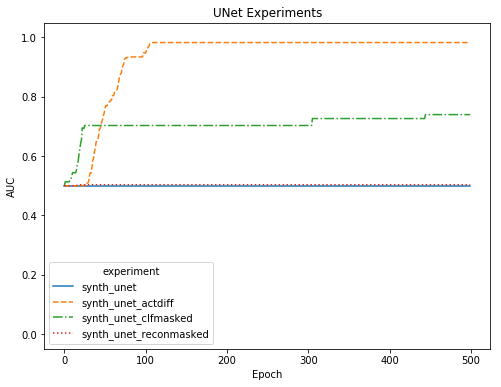

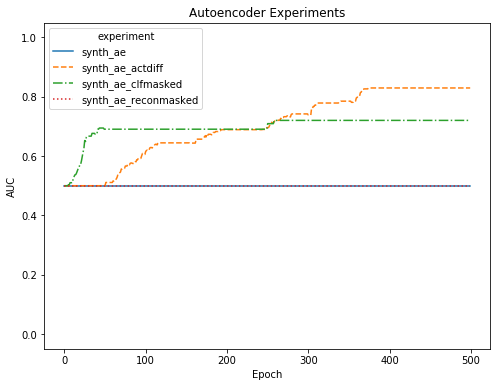

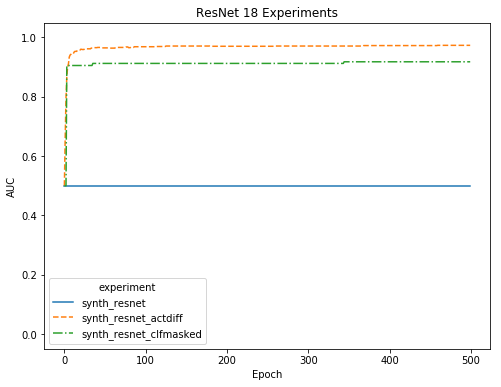

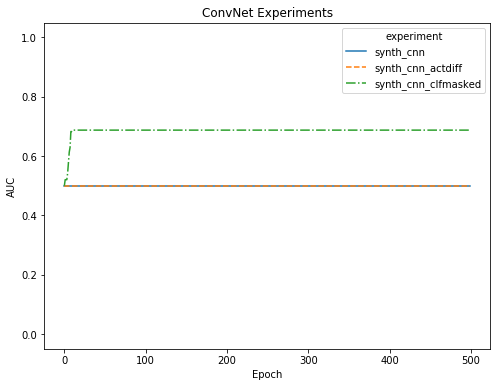

In [8]:
get_results(df_synth)

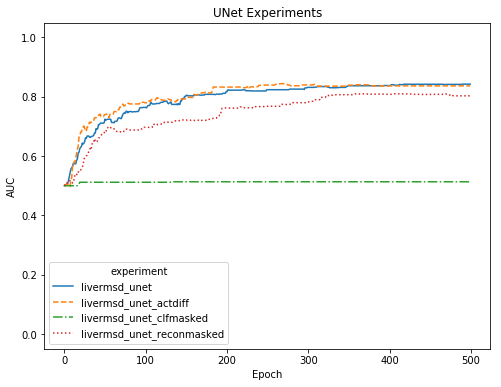

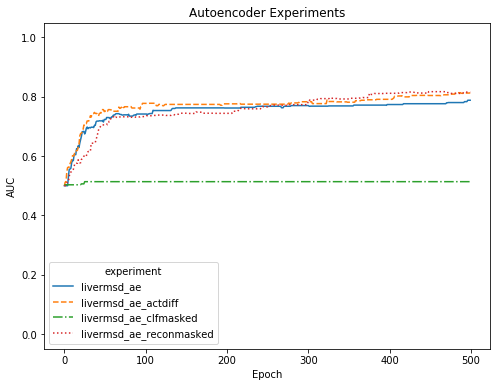

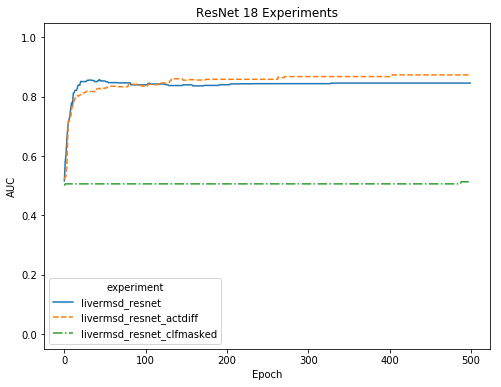

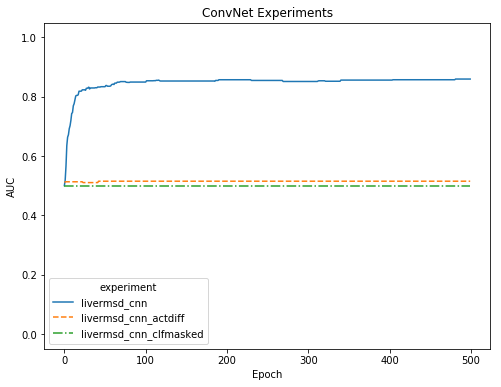

In [9]:
get_results(df_liver)

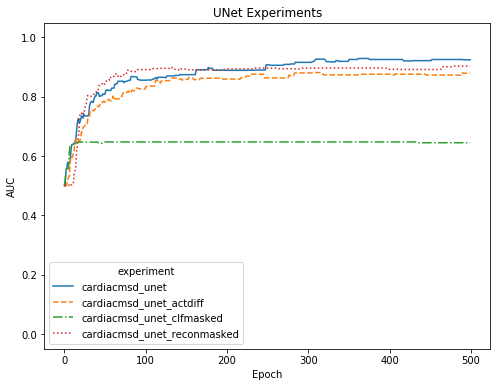

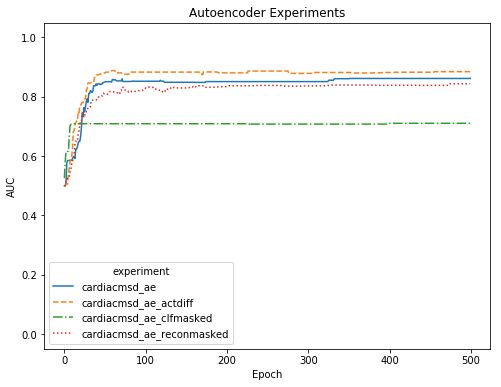

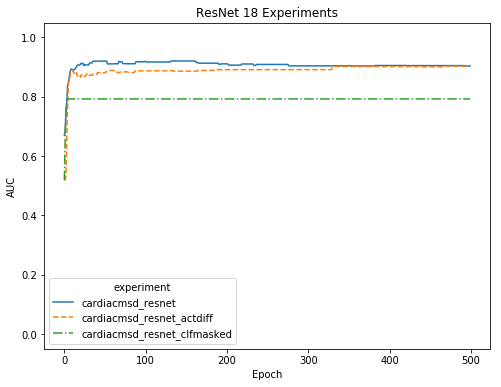

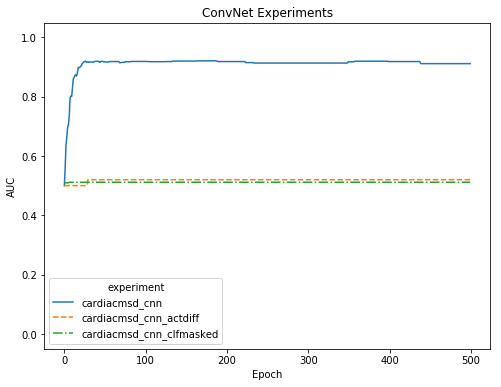

In [10]:
get_results(df_cardiac)

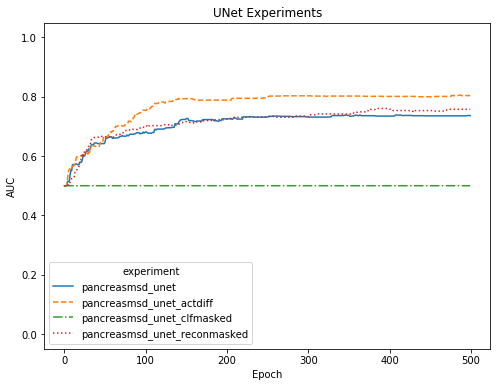

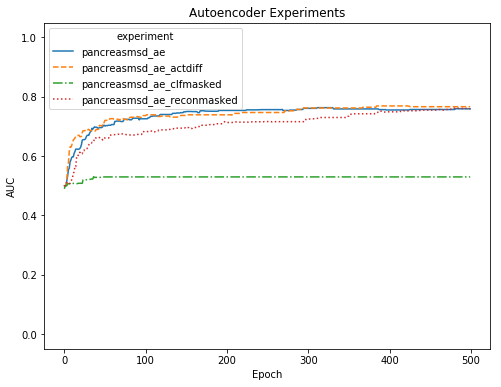

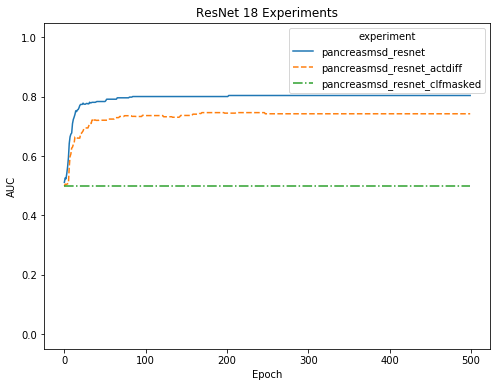

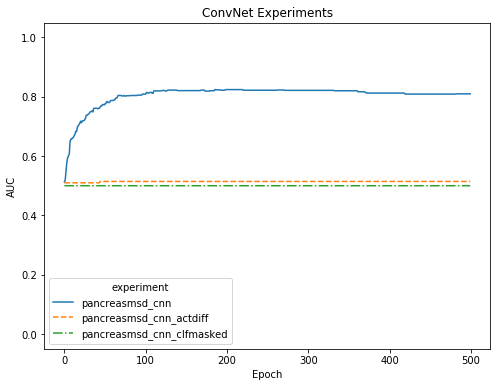

In [11]:
get_results(df_pancreas)

In [12]:
# Plot the mean / std of the best test AUC found for all experiments.
qq = df[(df.epoch==EPOCH)].groupby(["experiment_name", "epoch", "actdiff_lambda", "recon_lambda"])[["best_test_auc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')
q = q.join(qq.count(),rsuffix='_count')
q

,,,,best_test_auc,best_test_auc_std,best_test_auc_count
experiment_name,epoch,actdiff_lambda,recon_lambda,,,
cardiacmsd_ae,499,0,1,0.861719,0.129007,10
cardiacmsd_ae_actdiff,499,1,1,0.884549,0.029499,9
cardiacmsd_ae_clfmasked,499,0,1,0.710547,0.104758,10
cardiacmsd_ae_reconmasked,499,0,1,0.843750,0.166218,10
cardiacmsd_cnn,499,0,0,0.911719,0.028360,10
cardiacmsd_cnn_actdiff,499,1,0,0.520312,0.062873,10
cardiacmsd_cnn_clfmasked,499,0,0,0.511719,0.030813,10
cardiacmsd_resnet,499,0,0,0.903516,0.018047,10
cardiacmsd_resnet_actdiff,499,1,0,0.903125,0.030525,10
